In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "C:\\datasets\\spe\\World Bank Carbon Pricing.xlsx"
df = pd.read_excel(path, sheet_name='Crediting_Detail', skiprows=2)
df.head(3)

,Mechanism,Administration,Status,Year of Implementation,Scope,Clean Country,Administering Jurisdiction or organisation,Description of the mechanism,Recent developments,Region,...,Fugitive Emissions,Industrial Gases/Manufacturing,Renewable Energy,Transport,Waste,Compliance CPIs accepting credits generated through mechanism,Cumulative credits issued (in kt) until 31.12.2023,Cumulative credits retired (in kt) until 31.12.2023,Cumulative credits cancelled for administrative purposes (in kt) until 31.12.2023,Cumulative Projects Registered until 31.12.2023
0,Alberta Emission Offset System,Governmental,Implemented,2007.0,Subnational,Canada,Alberta,Alberta’s carbon offset crediting mechanism wa...,The TIER Regulation was amended effective Janu...,North America,...,Yes,Yes,Yes,No,Yes,Alberta TIER Regulation and Canada’s Output-ba...,88588.708,62868.563,1254.818,406
1,American Carbon Registry,Independent,Implemented,1996.0,Global,Global,NaN,"The American Carbon Registry (ACR), originally...",NaN,NaN,...,No,Yes,Yes,Yes,Yes,"CORSIA, Washington State CAR",267859.631,190889.383,12695.926,282
2,Australian Carbon Credit Unit Scheme (ACCU),Governmental,Implemented,2012.0,National,Australia,Australia,Australia’s carbon crediting mechanism started...,The Clean Energy Regulator is in the process o...,East Asia & Pacific,...,Yes,No,No,Yes,Yes,The Australian Safeguard Mechanism,140400.000,104200,200,2048


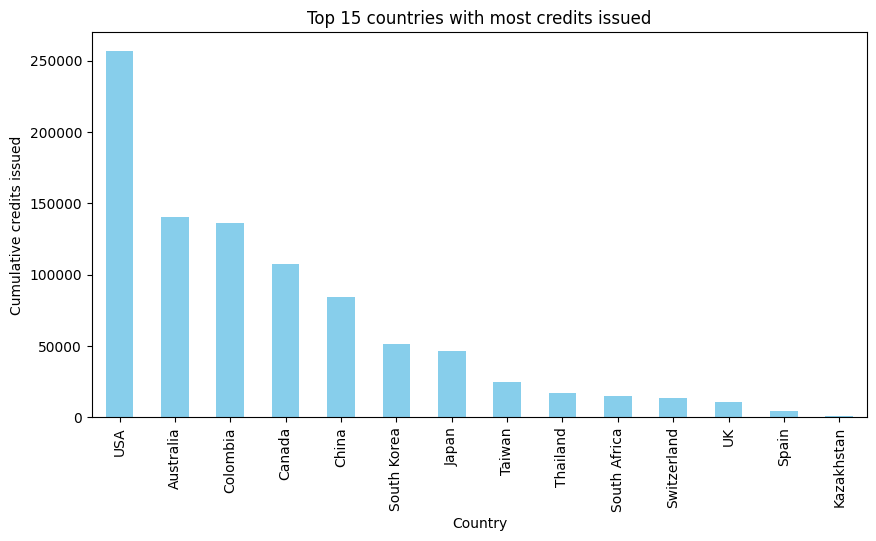

In [3]:
temp_df = df.groupby('Clean Country')['Cumulative credits issued (in kt) until 31.12.2023'].sum()
temp_df = temp_df.sort_values(ascending=False).iloc[1:15]
temp_df.plot(kind='bar', figsize=(10, 5), color='skyblue')
# plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Cumulative credits issued')
plt.title('Top 15 countries with most credits issued')
plt.savefig('Top 15 countries with most credits issued.png')
plt.show()

In [24]:
temp_df.to_csv('C:\\datasets\\spe\\top15_countries_in_credits.csv')

In [5]:
path = "C:\\datasets\\spe\\data-latest.xlsx"
df = pd.read_excel(path, sheet_name='Crediting_Issuance', skiprows=3)
df.head(3)

,Mechanism,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Alberta Emission Offset System,0,0,0,0,0,0,0,0,0,...,0,4011000,4463000,5057000.0,4866000.0,3618000.0,8400000.0,393000,6400000.0,7799074
1,American Carbon Registry,125000,0,500,2880358,11027146,5847510,7938812,6245281,171069,...,4287042,8732794,27095713,47983817.0,12048989.0,14229468.0,28693311.0,17563259,29322192.0,37355459
2,Australian Carbon Credit Unit Scheme (ACCU),0,0,0,0,0,0,0,0,0,...,7600000,7900000,13100000,12200000.0,12400000.0,14800000.0,16100000.0,17100000,17700000.0,17200000


C:\Users\sinaz\AppData\Local\Temp\ipykernel_17936\878057924.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


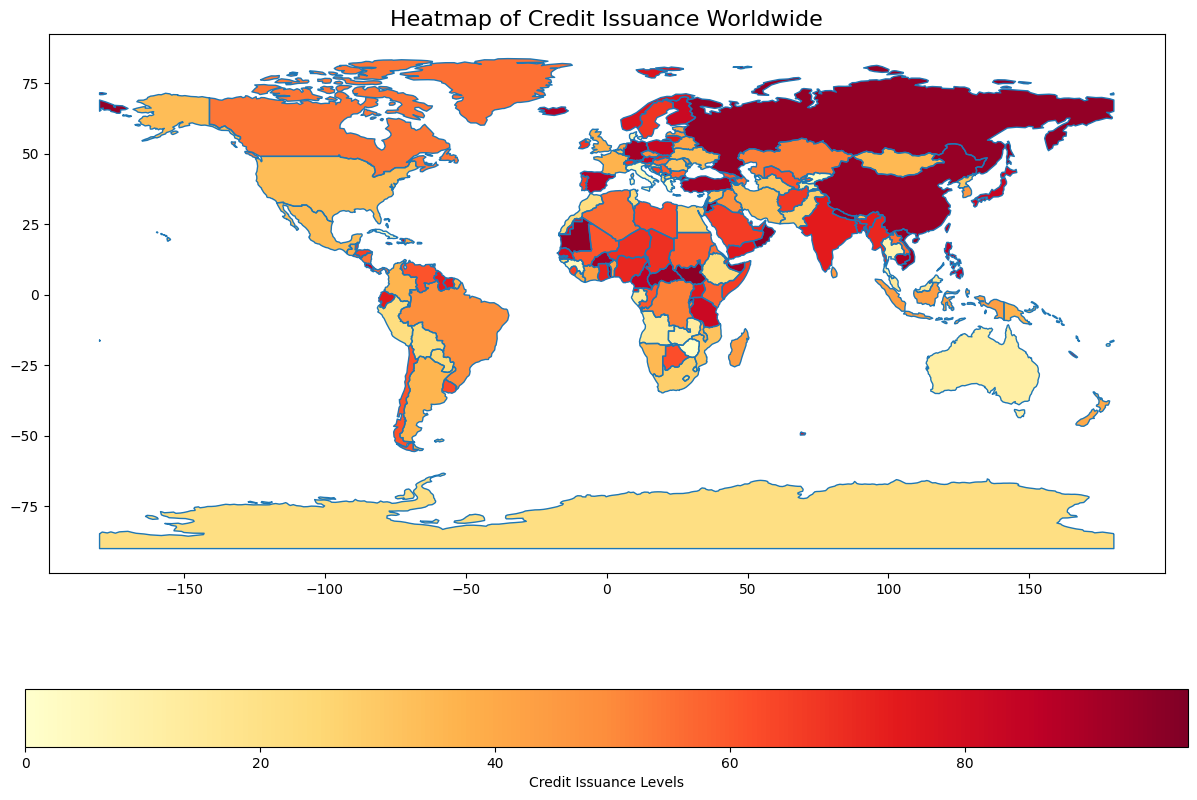

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load world map data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a random set of values for each country in the world data as placeholders
world['credit_issuance'] = np.random.randint(0, 100, size=len(world))

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map with credit issuance as a heatmap
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='credit_issuance', ax=ax, legend=True, cmap='YlOrRd', 
           legend_kwds={'label': "Credit Issuance Levels",
                        'orientation': "horizontal"})

# Set title and show plot
plt.title('Heatmap of Credit Issuance Worldwide', fontsize=16)
plt.show()


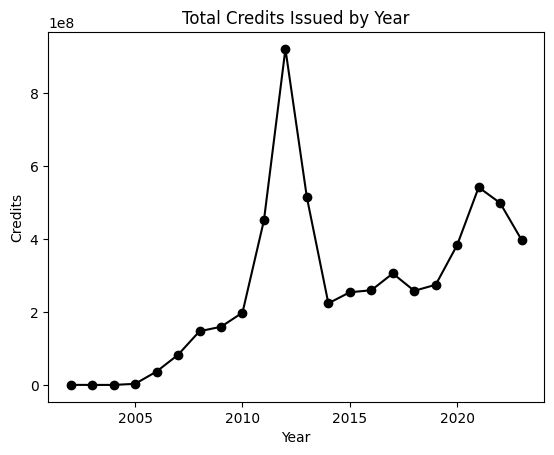

In [17]:
# sum over columns after the first column in a new row at the end
year_credit_sum = df.iloc[:, 1:].sum(axis=0)
plt.plot(year_credit_sum, color='black', marker='o')
plt.xlabel('Year')
plt.ylabel('Credits')
plt.title('Total Credits Issued by Year')
plt.show()


In [20]:
df = pd.read_excel(path, sheet_name='Crediting_Detail', skiprows=2)
df.head(3)

,Mechanism,Administration,Status,Year of Implementation,Scope,Administering Jurisdiction or organisation,Description of the mechanism,Recent developments,Region,Income Group of Administering Country,...,Fugitive Emissions,Industrial Gases/Manufacturing,Renewable Energy,Transport,Waste,Compliance CPIs accepting credits generated through mechanism,Cumulative credits issued (in kt) until 31.12.2023,Cumulative credits retired (in kt) until 31.12.2023,Cumulative credits cancelled for administrative purposes (in kt) until 31.12.2023,Cumulative Projects Registered until 31.12.2023
0,Alberta Emission Offset System,Governmental,Implemented,2007.0,Subnational,Alberta,Alberta’s carbon offset crediting mechanism wa...,The TIER Regulation was amended effective Janu...,North America,High income,...,Yes,Yes,Yes,No,Yes,Alberta TIER Regulation and Canada’s Output-ba...,88588.708,62868.563,1254.818,406
1,American Carbon Registry,Independent,Implemented,1996.0,Global,NaN,"The American Carbon Registry (ACR), originally...",NaN,NaN,NaN,...,No,Yes,Yes,Yes,Yes,"CORSIA, Washington State CAR",267859.631,190889.383,12695.926,282
2,Australian Carbon Credit Unit Scheme (ACCU),Governmental,Implemented,2012.0,National,Australia,Australia’s carbon crediting mechanism started...,The Clean Energy Regulator is in the process o...,East Asia & Pacific,High income,...,Yes,No,No,Yes,Yes,The Australian Safeguard Mechanism,140400.000,104200,200,2048


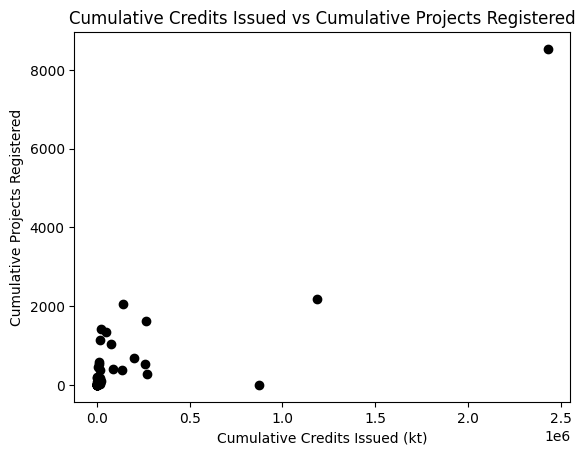

In [32]:
# rename columns for easier access Cumulative credits issued (in kt) until 31.12.2023 and Cumulative Projects Registered until 31.12.2023
df = df.rename(columns={'Cumulative credits issued (in kt) until 31.12.2023': 'Cumulative credits', 'Cumulative Projects Registered until 31.12.2023': 'Number of Projects'})
# drop the rows with NaN values in Cumulative credits and Number of Projects
df = df.dropna(subset=['Cumulative credits', 'Number of Projects'])
# drop the rows Not available in Cumulative credits and Number of Projects
df = df[df['Cumulative credits'] != 'Not available']
df = df[df['Number of Projects'] != 'Not available']
# plot Cumulative credits issued (in kt) until 31.12.2023 vs Cumulative Projects Registered until 31.12.2023
plt.scatter(df['Cumulative credits'], df['Number of Projects'], color='black', marker='o')
plt.xlabel('Cumulative Credits Issued (kt)')
plt.ylabel('Cumulative Projects Registered')
plt.title('Cumulative Credits Issued vs Cumulative Projects Registered')
plt.show()